# 按航空聯盟分類

**航空聯盟出現的次數**

In [47]:
import pandas as pd
import numpy as np

# 讀取資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 計算航空聯盟的出現次數
airline_combinations_count = df['航空聯盟'].value_counts()

# 將結果轉為 DataFrame，方便查看
result_df = airline_combinations_count.reset_index()
result_df.columns = ['航空聯盟', '出現次數']

# 排序按次數降序排列
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

# 對所有數據取對數
df['平均價格_log'] = df['平均價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['最低價格_log'] = df['最低價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['中位數價格_log'] = df['中位數價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['價格變異_log'] = df['價格變異'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df["最低價格剩餘天數_inv"] = df["最低價格剩餘天數"].apply(lambda x: 1/x if pd.notnull(x) and x != 0 else np.nan)

# 移除包含 NaN 的數據
plot_data = df.dropna(subset=["平均價格_log", "最低價格_log", "最低價格剩餘天數_inv", "價格變異_log", "中位數價格_log", "航空聯盟"])

   航空聯盟  出現次數
0     0   431
1     1   245
2     2   189
3     3   171
4     4    62


**處理後：Boxplot（按航空聯盟分類）**

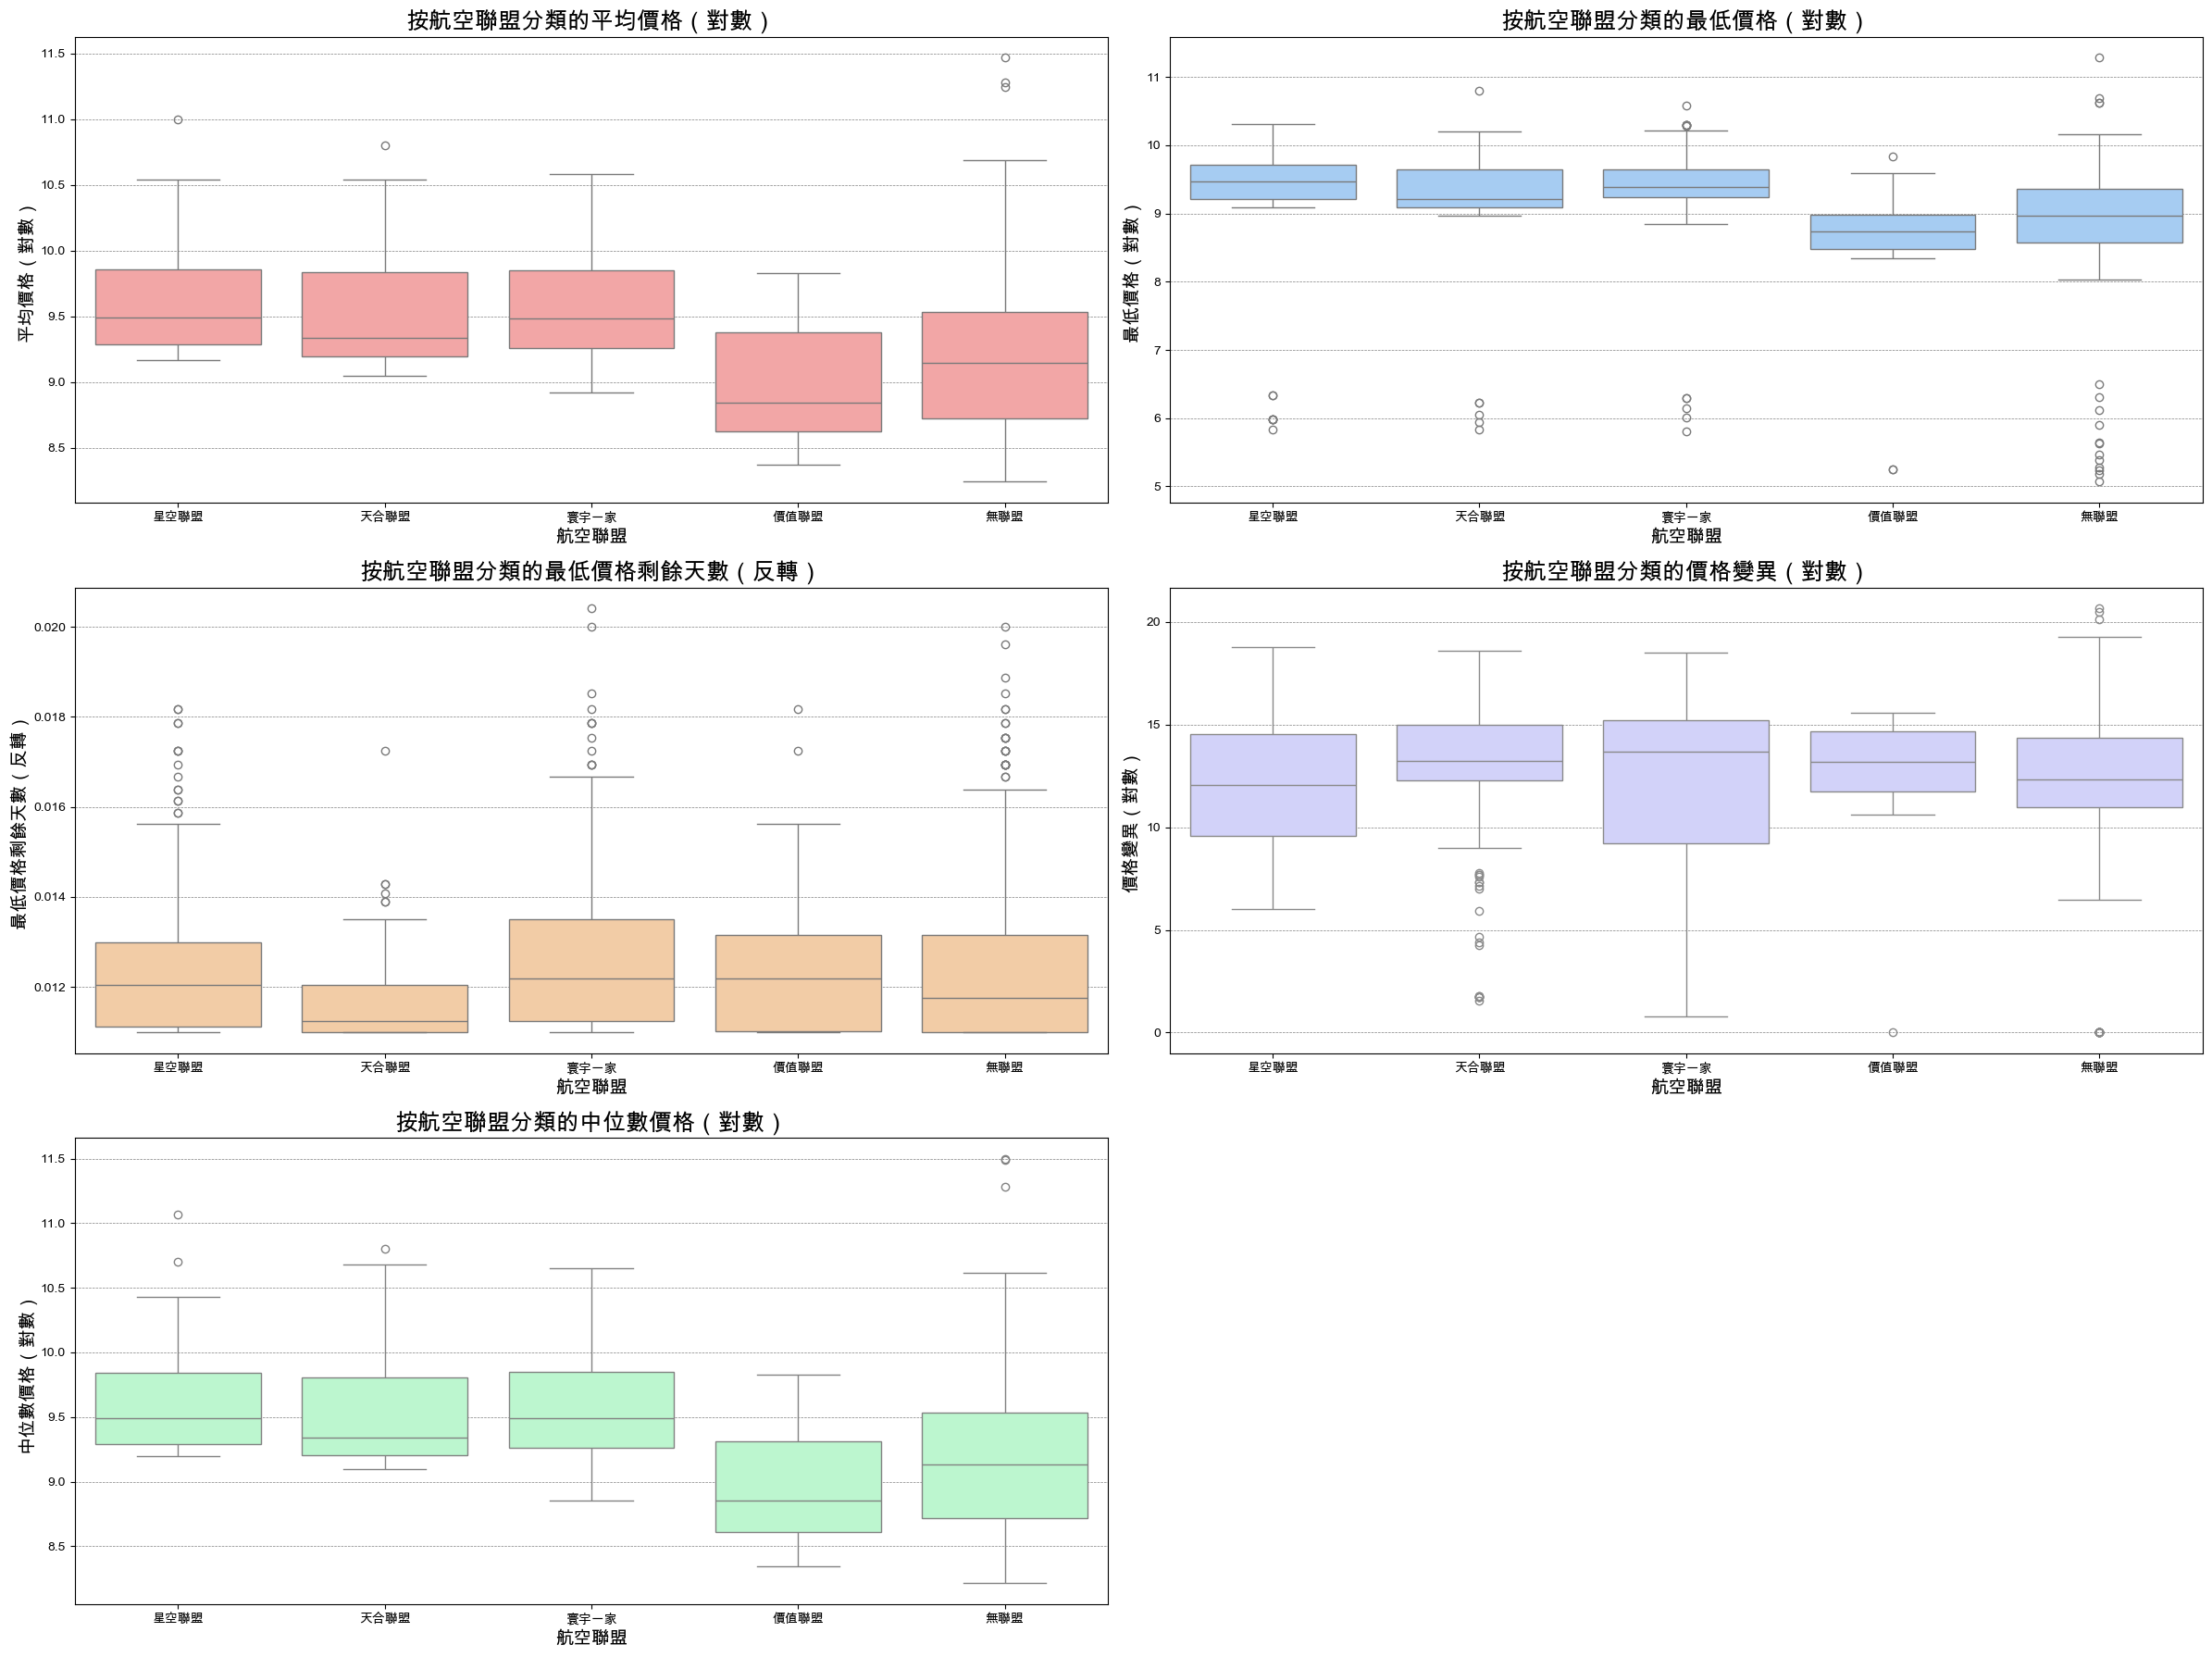

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 聯盟對應字典
alliance_mapping = {
    1: '星空聯盟',
    2: '天合聯盟',
    3: '寰宇一家',
    4: '價值聯盟',
    0: '無聯盟'
}

# 替換航空聯盟數值為聯盟名稱
plot_data['航空聯盟'] = plot_data['航空聯盟'].replace(alliance_mapping)

# 設定排序順序
alliance_order = ['星空聯盟', '天合聯盟', '寰宇一家', '價值聯盟', '無聯盟']
plot_data['航空聯盟'] = pd.Categorical(plot_data['航空聯盟'], categories=alliance_order, ordered=True)

# sort by 航空聯盟
plot_data = plot_data.sort_values(by='航空聯盟')

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(24, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按航空聯盟分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按航空聯盟分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按航空聯盟分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='航空聯盟', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按航空聯盟分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按航空聯盟分類的最低價格剩餘天數（反轉）的盒狀圖
sns.boxplot(data=plot_data, x='航空聯盟', y='最低價格剩餘天數_inv', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按航空聯盟分類的最低價格剩餘天數（反轉）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按航空聯盟分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='航空聯盟', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按航空聯盟分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按航空聯盟分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='航空聯盟', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按航空聯盟分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('航空聯盟', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**Kruskal-Wallis H Test**

In [49]:
from scipy.stats import kruskal

# 提取需要分析的數據
anova_data = df[['航空聯盟', '平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數_inv']].dropna()

# Kruskal-Wallis 檢測函數
def perform_kruskal(data, response_var):
    # 分組數據
    groups = [data[data['航空聯盟'] == alliance][response_var] for alliance in data['航空聯盟'].unique()]
    stat, p_value = kruskal(*groups)
    return stat, p_value

# 分別對每個變量進行檢測
for var in ['平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數_inv']:
    stat, p_value = perform_kruskal(anova_data, var)
    print(f"Kruskal-Wallis Test for {var}:")
    print(f"  H-statistic: {stat}")
    print(f"  p-value: {p_value}")
    if p_value < 0.05:
        print("  結果顯示：不同航空聯盟之間存在顯著差異。\n")
    else:
        print("  結果顯示：不同航空聯盟之間無顯著差異。\n")

Kruskal-Wallis Test for 平均價格_log:
  H-statistic: 191.68191694488857
  p-value: 2.3060019715766978e-40
  結果顯示：不同航空聯盟之間存在顯著差異。

Kruskal-Wallis Test for 最低價格_log:
  H-statistic: 233.43606074440186
  p-value: 2.4035129018254184e-49
  結果顯示：不同航空聯盟之間存在顯著差異。

Kruskal-Wallis Test for 中位數價格_log:
  H-statistic: 196.61877707030672
  p-value: 2.003389290194035e-41
  結果顯示：不同航空聯盟之間存在顯著差異。

Kruskal-Wallis Test for 價格變異_log:
  H-statistic: 22.26169569547265
  p-value: 0.00017775644512227595
  結果顯示：不同航空聯盟之間存在顯著差異。

Kruskal-Wallis Test for 最低價格剩餘天數_inv:
  H-statistic: 56.72996446130035
  p-value: 1.4095305083467402e-11
  結果顯示：不同航空聯盟之間存在顯著差異。



**Tukey HSD**

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    0.442    0.0  0.3404  0.5435   True
     0      2   0.3601    0.0  0.2494  0.4709   True
     0      3   0.4151    0.0  0.3004  0.5298   True
     0      4  -0.1911 0.0212 -0.3635 -0.0187   True
     1      2  -0.0818  0.363 -0.2047  0.0411  False
     1      3  -0.0269  0.978 -0.1533  0.0996  False
     1      4   -0.633    0.0 -0.8135 -0.4526   True
     2      3   0.0549 0.7956  -0.079  0.1889  False
     2      4  -0.5512    0.0  -0.737 -0.3654   True
     3      4  -0.6062    0.0 -0.7943  -0.418   True
----------------------------------------------------


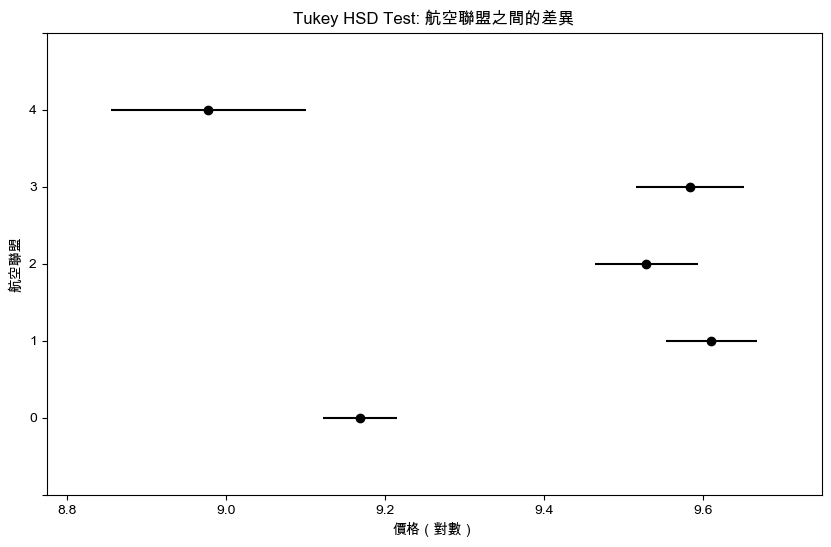

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 執行 Tukey HSD 測試
tukey = pairwise_tukeyhsd(endog=anova_data['平均價格_log'], groups=anova_data['航空聯盟'], alpha=0.05)

# 輸出測試結果
print(tukey)

# 繪製 Tukey HSD 結果
tukey.plot_simultaneous()
plt.title('Tukey HSD Test: 航空聯盟之間的差異')
plt.xlabel('價格（對數）')
plt.ylabel('航空聯盟')
plt.show()